In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [59]:
df_train_pure=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test_pure=pd.read_csv("../Dataset_prepared/Prepared_test.csv")


In [60]:
df_train_c = df_train_pure.copy()
df_test_c = df_test_pure.copy()


In [61]:
df_train_c.drop('actor',axis=1,inplace=True)
df_train_c.drop('filename',axis=1,inplace=True)
#df_train.drop('Unnamed: 0',axis=1,inplace=True)


df_test_c.drop('actor',axis=1,inplace=True)
df_test_c.drop('filename',axis=1,inplace=True)
#df_test.drop('Unnamed: 0',axis=1,inplace=True)






In [62]:
indexNames = df_train_pure[ df_train_pure['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_train_c.drop(indexNames,axis=0,inplace=True)



In [63]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train_c[i]=le.fit_transform(df_train_c[i])
categorical_col = ["emotion"]

df_train_c = pd.get_dummies(df_train_c, columns=categorical_col)    

df_train_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


In [64]:
numeric_features = [n for n in df_train_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_c[numeric_features])
df_train_c[numeric_features] = scaled_features
df_train_c.head()


col = [x for x in df_train_c.columns if x!='emotional_intensity']
X_train=df_train_c[col].values
y_train = np.array(df_train_c["emotional_intensity"])






In [65]:
for i in cat_var:
    df_test_c[i]=le.fit_transform(df_test_c[i])
categorical_col = ["emotion"]

df_test_c = pd.get_dummies(df_test_c, columns=categorical_col)    

df_test_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [66]:
indexNames = df_test_c[ df_test_c['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_test_c.drop(indexNames,axis=0,inplace=True)


In [67]:
numeric_features = [n for n in df_test_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]


scaled_features = scaler.transform(df_test_c[numeric_features])
df_test_c[numeric_features] = scaled_features
df_test_c.head()


col = [x for x in df_test_c.columns if x!='emotional_intensity']
X_test=df_test_c[col].values
y_test = np.array(df_test_c["emotional_intensity"])






ADASYN + altre tecniche

In [68]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [69]:
from imblearn.under_sampling import TomekLinks

tl = RandomUnderSampler(random_state=42)
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59, 1: 59})


In [70]:
df = pd.DataFrame(X_res,columns=col)

In [71]:
df['emotional_intensity'] = y_res

In [72]:
df

,vocal_channel,statement,repetition,sex,mean,q25,q50,q75,kur,skew,...,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,emotional_intensity
0,0.0,1.0,1.0,1.0,-0.245512,-0.269875,-0.026283,0.891575,-0.429509,0.256154,...,-0.076413,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,1.0,1.0,-0.068367,0.503731,-0.026283,-0.701434,0.138298,-0.569110,...,0.344283,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,0.0,1.0,0.0,-0.032231,0.525220,-0.026283,-0.725942,-0.208928,0.730746,...,0.220148,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,1.0,0.0,0.0,-0.086921,0.353307,-0.026283,-0.088738,-0.776657,-1.666707,...,-0.253420,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,1.0,-0.592242,-0.699656,-0.026283,1.786112,-0.778379,0.044605,...,-0.035150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.0,0.0,0.0,1.0,0.177601,-0.162430,-0.026283,0.352403,0.824051,0.584837,...,-1.501318,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
114,1.0,0.0,0.0,1.0,0.557975,-1.021992,-0.026283,1.161162,1.556516,-0.845059,...,-1.687312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
115,0.0,0.0,1.0,1.0,0.004591,-0.527744,-0.026283,3.317851,-0.512144,0.277603,...,1.748488,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
116,0.0,1.0,1.0,1.0,0.171260,-0.656678,-0.026283,4.200134,-0.016974,-0.390106,...,0.915872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


### Oultlier analysis

In [73]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [74]:
clf_LOF = LocalOutlierFactor(n_neighbors = 21)
y_pred = clf_LOF.fit_predict(df)
y_outliers = df[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 11, 107]))

In [75]:
# list with indexes and scores only for outliers --> np.where(y_pred==-1)
outlier_All_indexes_LOF = list(np.where(y_pred==-1)[0])
outlier_indexes = np.where(y_pred==-1)[0]
outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))

#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

11


[(60, -2.169796535247231),
 (86, -2.081301159459657),
 (68, -1.9170036000216022),
 (70, -1.886698381770122),
 (114, -1.867821221074929),
 (65, -1.7095159140722733),
 (75, -1.6413704347952722),
 (76, -1.6410472436524877),
 (46, -1.6014730102055945),
 (53, -1.5548206758959744)]

###  knn

In [76]:
clf_KNN = KNN(n_neighbors=5)
clf_KNN.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [77]:
outliers_KNN = clf_KNN.predict(df)
np.unique(outliers_KNN, return_counts=True)

(array([0, 1]), array([106,  12]))

In [78]:
outlier_All_indexes_knn=list(np.where(outliers_KNN==1)[0])
outlier_indexes_knn = np.where(outliers_KNN==1)[0]
outlier_scores_knn = clf_KNN.decision_scores_[outlier_indexes_knn]
y_outliers_knn = df[outliers_KNN==1]

### ABOD

In [79]:
clf_ABOD = ABOD()
clf_ABOD.fit(df)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [80]:
outliers_ABOD = clf_ABOD.predict(df)
np.unique(outliers_ABOD, return_counts=True)

(array([0, 1]), array([103,  15]))

In [81]:
outlier_All_indexes_abod=list(np.where(outliers_ABOD==1)[0])
outlier_indexes_abod = np.where(outliers_ABOD==1)[0]
outlier_scores_abod = clf_ABOD.decision_scores_[outlier_indexes_abod]
y_outliers_ABOD = df[outliers_ABOD==1]

### ISO

In [82]:
from sklearn.ensemble import IsolationForest
clf_if = IsolationForest(random_state=0)
clf_if.fit(df)

IsolationForest(random_state=0)

In [83]:
outliers_if = clf_if.predict(df)
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([  8, 110]))

In [84]:
outlier_All_indexes_IF=list(np.where(df == -1)[0])
y_outliers_if = df[outliers_if==1]
outlier_indexes_if = np.where(outliers_if == -1)[0]
indexes_list_if = list(outlier_indexes_if)  #retrieve index of outliers

outlier_scores_if=clf_if.decision_function(df)

In [85]:
import shap
explainer = shap.Explainer(clf_if.predict, df)
shap_values = explainer(df,max_evals=800)

Permutation explainer: 119it [41:23, 21.23s/it]                            


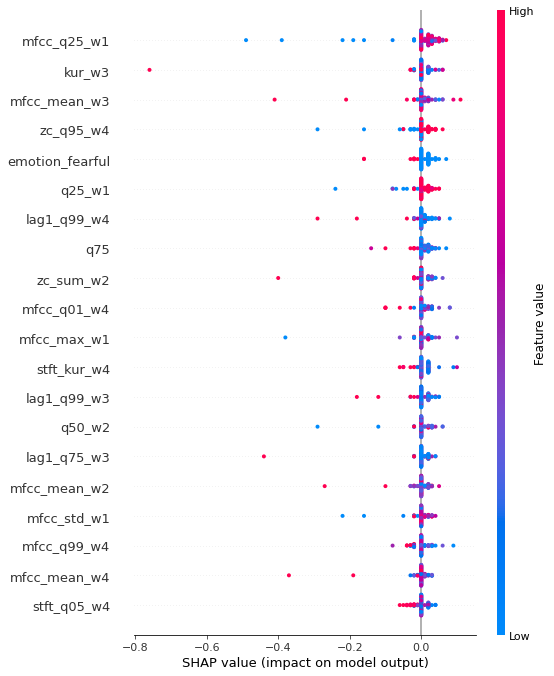

In [86]:
shap.summary_plot(shap_values, df)


### Intersezioni

INTERSEZIONE TECNICHE


In [87]:
set_LOF_ALL=set(outlier_All_indexes_LOF)
#set_HBOS_ALL=set(outlier_All_indexes_HBOS)
set_KNN_ALL=set(outlier_All_indexes_knn)
set_ABOD_ALL=set(outlier_All_indexes_abod)
#set_IF_ALL=set(outlier_All_indexes_IF)
intersection_Random = set.intersection(set_LOF_ALL,set_KNN_ALL,set_ABOD_ALL)
len(intersection_Random)

10

In [88]:
df.loc[intersection_Random]

,vocal_channel,statement,repetition,sex,mean,q25,q50,q75,kur,skew,...,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,emotional_intensity
65,0.0,0.0,0.0,1.0,0.041478,-5.341291,-0.026283,2.043444,-0.233024,1.440722,...,1.683085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68,1.0,1.0,1.0,1.0,1.327748,-2.139423,-0.026283,3.611945,1.032693,-0.133202,...,-0.068564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
70,0.0,0.0,1.0,1.0,0.228429,-3.643656,-0.026283,5.278478,-0.976222,0.252802,...,0.561468,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
75,1.0,1.0,0.0,0.0,0.010113,-2.225379,-0.026283,1.504271,-0.156766,1.267222,...,0.772169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76,0.0,1.0,0.0,0.0,-0.590013,-2.053466,-0.026283,2.116967,-0.378628,0.900730,...,0.515593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
46,0.0,1.0,1.0,0.0,4.348994,-2.956007,9.111421,2.116967,-0.756594,0.523005,...,-1.808715,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
114,1.0,0.0,0.0,1.0,0.557975,-1.021992,-0.026283,1.161162,1.556516,-0.845059,...,-1.687312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
53,1.0,0.0,0.0,0.0,-0.059566,0.525220,-0.026283,-0.725942,-0.374334,0.568749,...,0.560270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
86,0.0,1.0,1.0,0.0,0.159700,-8.371247,-0.026283,4.298165,-0.658955,1.023147,...,2.150508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
60,1.0,0.0,0.0,1.0,0.506631,-1.086459,-0.026283,0.842560,0.465091,1.481433,...,1.911990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [89]:
intersection_normal = {
 249,
 292,
 308,
 309,
 311,
 382,
 554,
 832,
 1247,
 1283,
 1358,
 1481,
 1492,
 1702,
 1703,
 1704,
 1756,
 1757,
 1758,
 1801}

In [90]:
intersection_normal_Random = set.intersection(intersection_normal,intersection_Random)
len(intersection_normal_Random)

0

In [91]:
intersection_K = {40,
 352,
 425,
 546,
 840,
 853,
 954,
 970,
 971,
 1008,
 1015,
 1028,
 1029,
 1031,
 1360,
 1374,
 1703,
 1705}

In [92]:
intersection_K_Random = set.intersection(intersection_K,intersection_Random)
len(intersection_K_Random)

0

In [93]:
intersection_MDS = {352,546,1028,1029,1703,1031,40,425,1705,840,970,971,1360,1008,853,1015,954,1374}

In [35]:
intersection_MDS_Random = set.intersection(intersection_MDS,intersection_Random)
len(intersection_MDS_Random)

0

### OVERSAMPLING

In [36]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(random_state=42)
X_res_a, y_res_a = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_a))

Resampled dataset shape Counter({0: 984, 1: 984})


In [40]:
df1 = pd.DataFrame(X_res,columns=col)

In [41]:
df1['emotional_intensity'] = y_res

LOF

In [42]:
clf_LOF = LocalOutlierFactor(n_neighbors = 21)
y_pred = clf_LOF.fit_predict(df1)
y_outliers = df1[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 14, 104]))

In [43]:
# list with indexes and scores only for outliers --> np.where(y_pred==-1)
outlier_All_indexes_LOF = list(np.where(y_pred==-1)[0])
outlier_indexes = np.where(y_pred==-1)[0]
outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))

#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

14


[(99, -2.1046731327675685),
 (85, -2.070196416543267),
 (68, -2.030976178953717),
 (67, -2.0046156409284692),
 (115, -1.9504829829174737),
 (86, -1.7700441502026512),
 (100, -1.6976449011592973),
 (46, -1.6539155101730092),
 (82, -1.6445721208071713),
 (116, -1.5934668840496484)]

KNN

In [44]:
clf_KNN = KNN(n_neighbors=5)
clf_KNN.fit(df1)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [45]:
outliers_KNN = clf_KNN.predict(df1)
np.unique(outliers_KNN, return_counts=True)

(array([0, 1]), array([107,  11]))

In [46]:
outlier_All_indexes_knn=list(np.where(outliers_KNN==1)[0])
outlier_indexes_knn = np.where(outliers_KNN==1)[0]
outlier_scores_knn = clf_KNN.decision_scores_[outlier_indexes_knn]
y_outliers_knn = df1[outliers_KNN==1]

ABOD

In [47]:
clf_ABOD = ABOD()
clf_ABOD.fit(df1)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [48]:
outliers_ABOD = clf_ABOD.predict(df1)
np.unique(outliers_ABOD, return_counts=True)

(array([0, 1]), array([106,  12]))

In [49]:
outlier_All_indexes_abod=list(np.where(outliers_ABOD==1)[0])
outlier_indexes_abod = np.where(outliers_ABOD==1)[0]
outlier_scores_abod = clf_ABOD.decision_scores_[outlier_indexes_abod]
y_outliers_ABOD = df1[outliers_ABOD==1]

ISO

In [51]:
clf_if = IsolationForest(random_state=0)
clf_if.fit(df1)

IsolationForest(random_state=0)

In [52]:
outlier_All_indexes_IF=list(np.where(df == -1)[0])
y_outliers_if = df1[outliers_if==1]
outlier_indexes_if = np.where(outliers_if == -1)[0]
indexes_list_if = list(outlier_indexes_if)  #retrieve index of outliers

outlier_scores_if=clf_if.decision_function(df1)

INTERSEZIONI

In [53]:
set_LOF_ALL=set(outlier_All_indexes_LOF)
#set_HBOS_ALL=set(outlier_All_indexes_HBOS)
set_KNN_ALL=set(outlier_All_indexes_knn)
set_ABOD_ALL=set(outlier_All_indexes_abod)
set_IF_ALL=set(outlier_All_indexes_IF)
intersection_Over = set.intersection(set_LOF_ALL,set_KNN_ALL,set_ABOD_ALL)
len(intersection_Over)

7

In [55]:
df1.loc[intersection_Over]

,vocal_channel,statement,repetition,sex,mean,q25,q50,q75,kur,skew,...,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,emotional_intensity
67,1.0,0.0,0.0,1.0,-0.255898,-1.588189,-0.020881,2.413698,1.065837,0.083170,...,-1.359285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
99,1.0,1.0,0.0,0.0,0.787946,-0.115766,-0.020881,-0.267869,1.419436,3.260225,...,-2.198188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
68,1.0,1.0,1.0,1.0,0.106668,-3.500140,-0.020881,4.283415,0.635975,0.113697,...,2.276719,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
46,0.0,1.0,1.0,0.0,3.656416,-3.016658,8.690469,2.118480,-0.750047,0.522037,...,-1.770026,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
82,1.0,1.0,1.0,0.0,-0.334822,-2.862823,-0.020881,1.847863,-0.460915,1.366414,...,2.903386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
115,0.0,0.0,1.0,1.0,-1.973882,-4.071528,4.334794,4.923055,-0.206086,0.404534,...,-1.086900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85,1.0,1.0,0.0,1.0,-14.355142,-1.588189,-8.732230,1.159020,3.611617,1.527304,...,-2.211658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


INTERSEZIONE NORMAL

In [58]:
intersection_Over_normal = set.intersection(intersection_Over,intersection_normal)
len(intersection_Over_normal)

0

INTERSEZIONE_MDS

In [64]:
intersection_Over_MDS = set.intersection(intersection_Over,intersection_normal)
len(intersection_Over_MDS)

0

INTERSEZIONE K BEST

In [65]:
intersection_Over_MDS = set.intersection(intersection_K,intersection_Over)
len(intersection_Over_MDS)

0

INTERSEZIONE UNDER + OVER 

In [68]:
intersection_Over_under = set.intersection(intersection_Random,intersection_Over)
len(intersection_Over_under)

7

In [69]:
df1.loc[intersection_Over_under]

,vocal_channel,statement,repetition,sex,mean,q25,q50,q75,kur,skew,...,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,emotional_intensity
99,1.0,1.0,0.0,0.0,0.787946,-0.115766,-0.020881,-0.267869,1.419436,3.260225,...,-2.198188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
67,1.0,0.0,0.0,1.0,-0.255898,-1.588189,-0.020881,2.413698,1.065837,0.083170,...,-1.359285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
68,1.0,1.0,1.0,1.0,0.106668,-3.500140,-0.020881,4.283415,0.635975,0.113697,...,2.276719,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
46,0.0,1.0,1.0,0.0,3.656416,-3.016658,8.690469,2.118480,-0.750047,0.522037,...,-1.770026,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
82,1.0,1.0,1.0,0.0,-0.334822,-2.862823,-0.020881,1.847863,-0.460915,1.366414,...,2.903386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
115,0.0,0.0,1.0,1.0,-1.973882,-4.071528,4.334794,4.923055,-0.206086,0.404534,...,-1.086900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85,1.0,1.0,0.0,1.0,-14.355142,-1.588189,-8.732230,1.159020,3.611617,1.527304,...,-2.211658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
